# Assignment 3 + Assignment 4 + TSIS 

In [2]:
pip install kaggle kagglehub

Note: you may need to restart the kernel to use updated packages.


## Task 1. Word Embeddings and Vector Representations


### Exercise 1: One-hot Encoding and TF-IDF

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("juhibhojani/airline-reviews")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/airline-reviews


In [4]:
import pandas as pd

# dataset
df = pd.read_csv(f"{path}/Airline_review.csv")
print(df.head())
print(df.shape)
df = df.iloc[:100]
print(df.shape)

   Unnamed: 0   Airline Name Overall_Rating  \
0           0    AB Aviation              9   
1           1    AB Aviation              1   
2           2    AB Aviation              1   
3           3  Adria Airways              1   
4           4  Adria Airways              1   

                            Review_Title          Review Date  Verified  \
0                "pretty decent airline"   11th November 2019      True   
1                   "Not a good airline"       25th June 2019      True   
2         "flight was fortunately short"       25th June 2019      True   
3    "I will never fly again with Adria"  28th September 2019     False   
4  "it ruined our last days of holidays"  24th September 2019      True   

                                              Review       Aircraft  \
0    Moroni to Moheli. Turned out to be a pretty ...            NaN   
1   Moroni to Anjouan. It is a very small airline...           E120   
2    Anjouan to Dzaoudzi. A very small airline an... 

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [5]:
sentences = df["Review"].head(2)
sentences

0      Moroni to Moheli. Turned out to be a pretty ...
1     Moroni to Anjouan. It is a very small airline...
Name: Review, dtype: object

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder

# One-hot Encoding
encoder = OneHotEncoder(sparse_output=False)
words = [word for sentence in sentences for word in sentence.split()]
words = list(set(words))

# fit encoder
encoder.fit([[word] for word in words])

one_hot = encoder.transform([[word] for word in words])

# TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(sentences)
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

print("One-hot Encoding for each word in the vocabulary:")
print(pd.DataFrame(one_hot, columns=words))

print("\nTF-IDF Scores for sentences:")
print(df_tfidf)


One-hot Encoding for each word in the vocabulary:
     still  usual,  that  bumped  confusion  looked  true  good  boarding  \
0      0.0     0.0   0.0     0.0        0.0     0.0   0.0   0.0       0.0   
1      0.0     0.0   0.0     0.0        0.0     0.0   0.0   0.0       0.0   
2      0.0     0.0   0.0     0.0        0.0     0.0   0.0   0.0       0.0   
3      0.0     0.0   0.0     0.0        0.0     0.0   0.0   0.0       0.0   
4      0.0     0.0   0.0     0.0        0.0     0.0   0.0   0.0       0.0   
..     ...     ...   ...     ...        ...     ...   ...   ...       ...   
125    0.0     0.0   0.0     0.0        0.0     0.0   0.0   0.0       0.0   
126    0.0     0.0   0.0     0.0        0.0     0.0   0.0   0.0       0.0   
127    0.0     0.0   0.0     0.0        0.0     0.0   0.0   0.0       0.0   
128    0.0     0.0   0.0     0.0        0.0     0.0   0.0   0.0       0.0   
129    0.0     0.0   0.0     0.0        0.0     0.0   0.0   0.0       0.0   

     were  ...  30mins  b

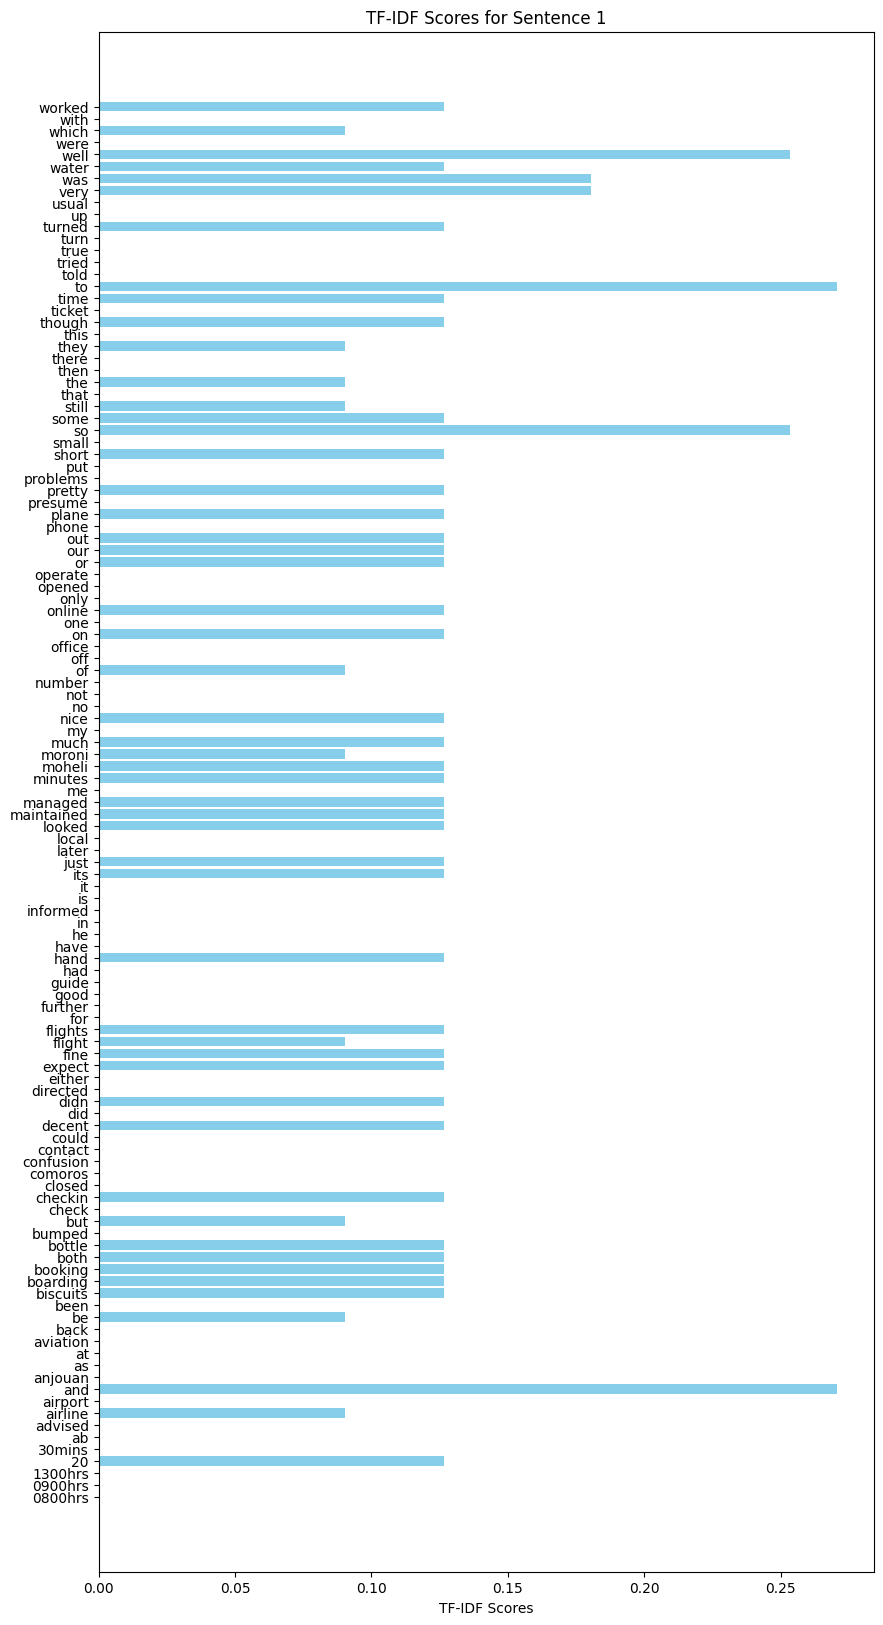

In [7]:
import matplotlib.pyplot as plt

# For visualization, let's pick the first sentence's TF-IDF values
sentence_index = 0  # Index for the sentence we want to visualize
sentence_tfidf = df_tfidf.iloc[sentence_index]

# Get words and their corresponding TF-IDF values
words = sentence_tfidf.index
values = sentence_tfidf.values

# Create a bar chart
plt.figure(figsize=(10, 20))
plt.barh(words, values, color='skyblue')
plt.xlabel('TF-IDF Scores')
plt.title(f'TF-IDF Scores for Sentence {sentence_index + 1}')
plt.show()


### Task 2. Word2Vec (CBOW, Skip-gram)

In [8]:
import pandas as pd

# dataset
df = pd.read_csv(f"{path}/Airline_review.csv")
print(df.head())
print(df.shape)
df = df.iloc[:100]
print(df.shape)

   Unnamed: 0   Airline Name Overall_Rating  \
0           0    AB Aviation              9   
1           1    AB Aviation              1   
2           2    AB Aviation              1   
3           3  Adria Airways              1   
4           4  Adria Airways              1   

                            Review_Title          Review Date  Verified  \
0                "pretty decent airline"   11th November 2019      True   
1                   "Not a good airline"       25th June 2019      True   
2         "flight was fortunately short"       25th June 2019      True   
3    "I will never fly again with Adria"  28th September 2019     False   
4  "it ruined our last days of holidays"  24th September 2019      True   

                                              Review       Aircraft  \
0    Moroni to Moheli. Turned out to be a pretty ...            NaN   
1   Moroni to Anjouan. It is a very small airline...           E120   
2    Anjouan to Dzaoudzi. A very small airline an... 

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [9]:
import spacy
import nltk
from nltk.corpus import stopwords

nlp = spacy.load("en_core_web_sm")
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    doc = nlp(text.lower())  # Convert to lowercase
    tokens = [token.lemma_ for token in doc if token.is_alpha and token.text not in stop_words]
    return tokens

df["processed_review"] = df["Review"].apply(preprocess_text)

df["processed_review"].iloc[0]

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['moroni',
 'moheli',
 'turn',
 'pretty',
 'decent',
 'airline',
 'online',
 'booking',
 'work',
 'well',
 'checkin',
 'boarding',
 'fine',
 'plane',
 'look',
 'well',
 'maintain',
 'short',
 'flight',
 'minute',
 'expect',
 'much',
 'still',
 'manage',
 'hand',
 'bottle',
 'water',
 'biscuit',
 'though',
 'nice',
 'flight',
 'time']

In [10]:
pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 47.3 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
nilearn 0.11.1 requires scikit-learn>=1.4.0, but you have scikit-learn 1.2.2 which is incompatible.
bigframes 1.36.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.5 which is inc

In [11]:
from gensim.models import Word2Vec

sentences = df["processed_review"].tolist()

# CBOW model
cbow_model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, sg=0)
# Skip-gram model
skipgram_model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, sg=1)

# get vector for a word
w2v_vector_cbow = cbow_model.wv["flight"] 
print(w2v_vector_cbow)

w2v_vector_skipgram = skipgram_model.wv["flight"] 
print(w2v_vector_skipgram)

[-0.04398994  0.04407939  0.01589157  0.01344791 -0.00454827 -0.10688397
  0.02398367  0.14106534 -0.06287542 -0.05398356 -0.00373557 -0.08865558
 -0.03167253  0.01288003 -0.00819215 -0.02071931  0.00267681 -0.08492703
 -0.02563813 -0.11713462  0.00902439  0.03570274  0.05737587 -0.0278993
 -0.00071252  0.0251923  -0.01331767 -0.05247293 -0.05706044 -0.00032473
  0.04075801  0.01794773  0.07278255 -0.02206154 -0.05114215  0.08541432
  0.02871884 -0.0552923  -0.04184134 -0.11729982 -0.00692301 -0.06909134
 -0.01705378 -0.00870975  0.05617609  0.00469734 -0.03305315 -0.00547359
  0.02468421  0.02797854  0.03916834 -0.01808366  0.01757385  0.00839974
 -0.01648669  0.03395174  0.02610094 -0.02093952 -0.04699839  0.05308933
  0.00293664  0.02238642 -0.00412872 -0.04984264 -0.06616189  0.01726091
  0.06044581  0.09129684 -0.07970353  0.08259432 -0.04974783  0.00155793
  0.03409007 -0.01806333  0.08611725  0.0523155   0.02578183 -0.01058459
 -0.08620207  0.02212785 -0.00205294  0.03769322 -0.

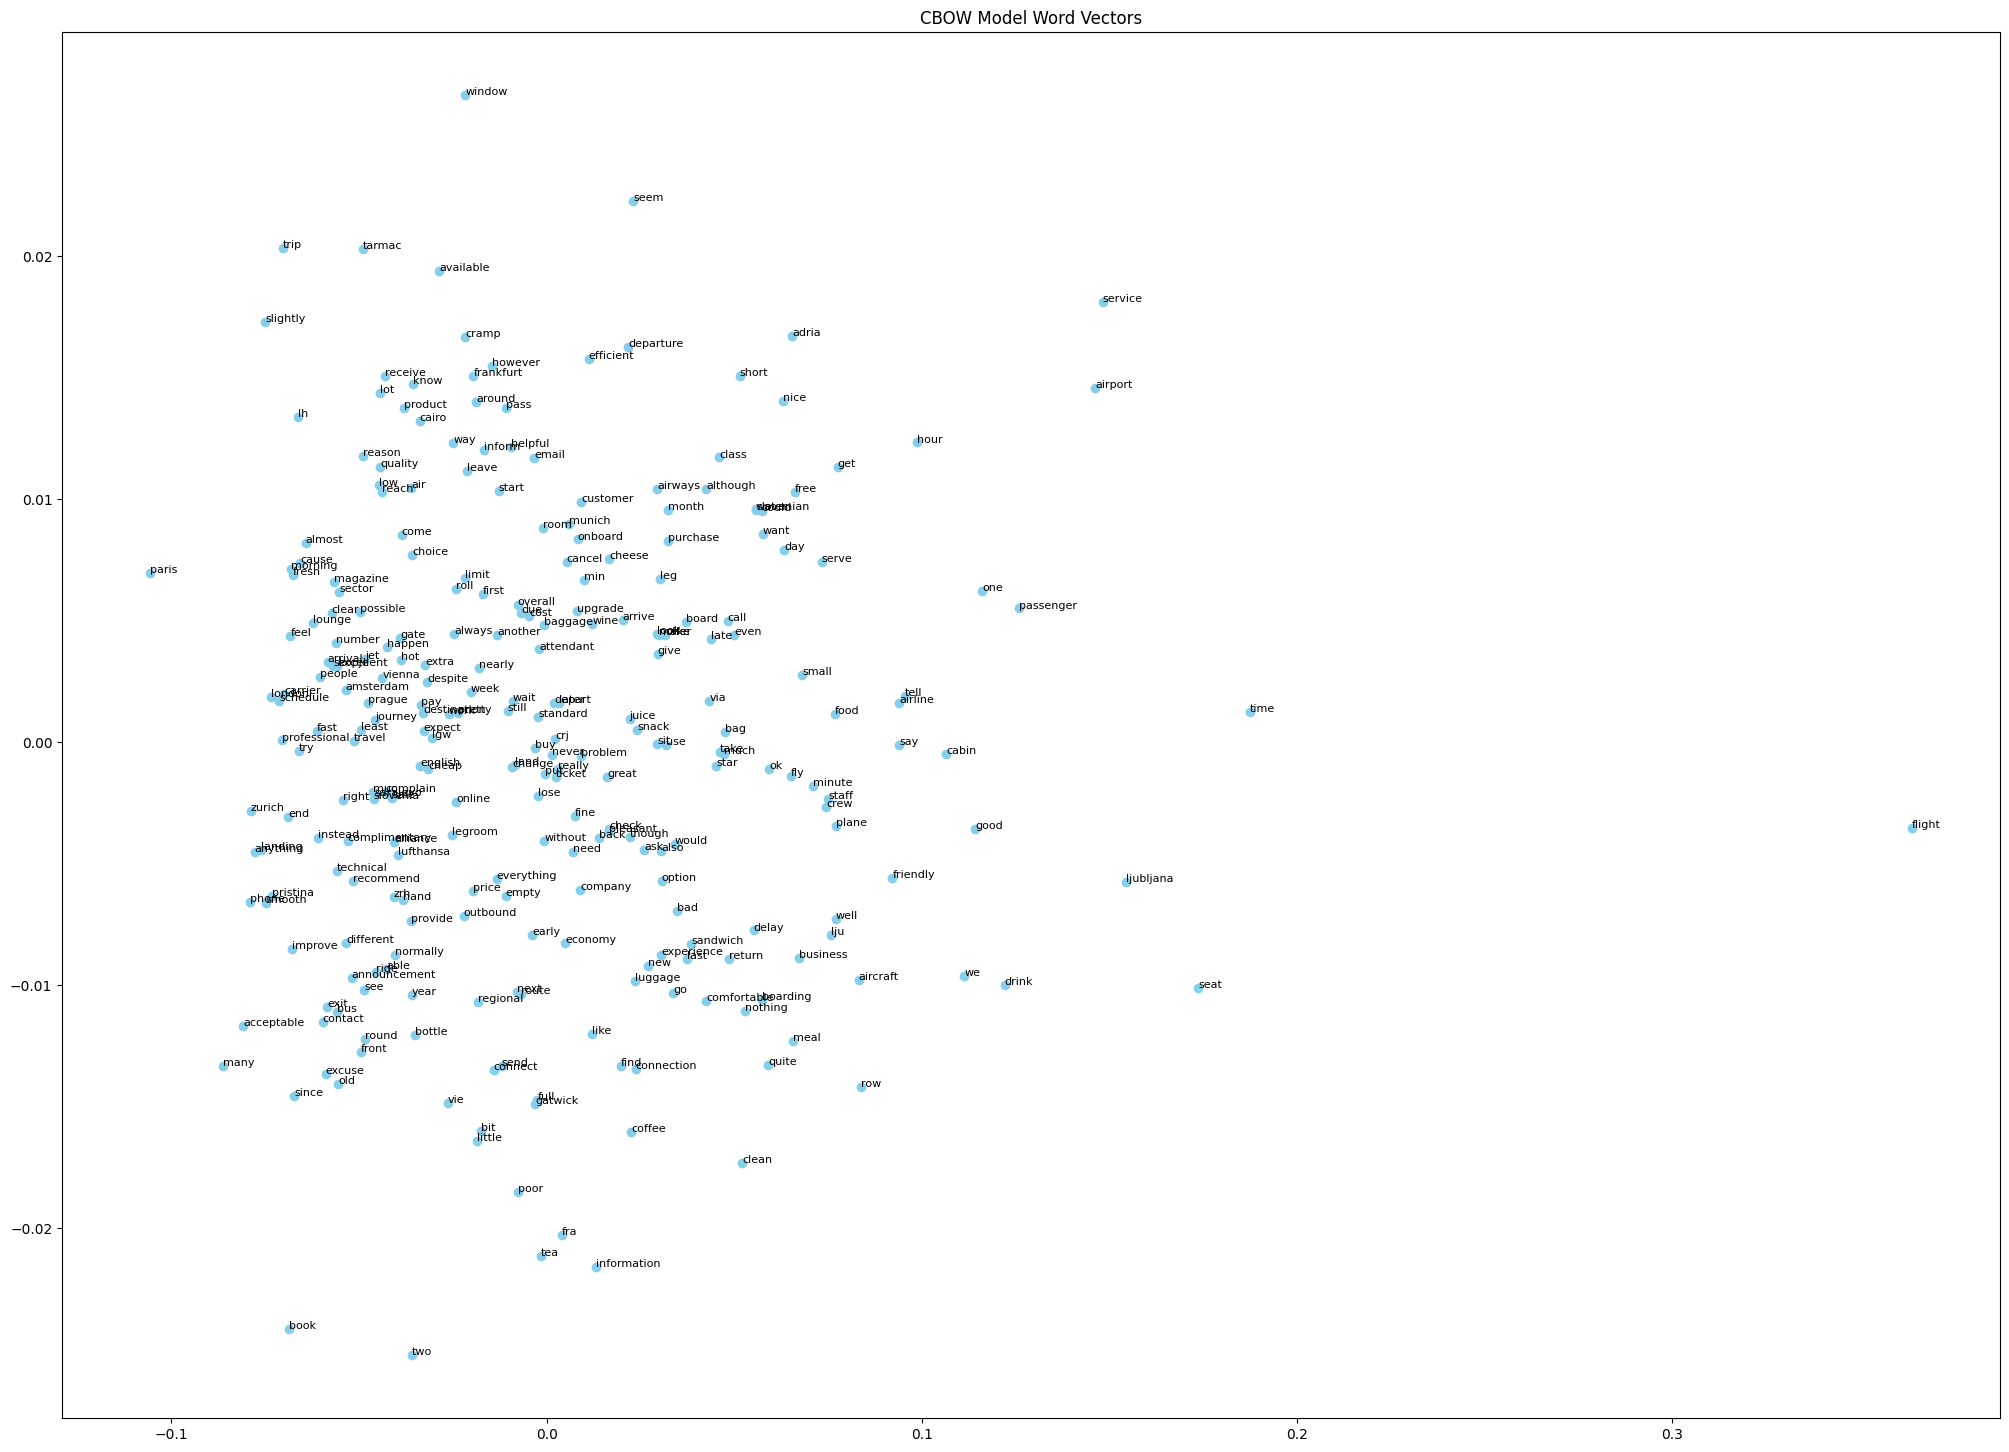

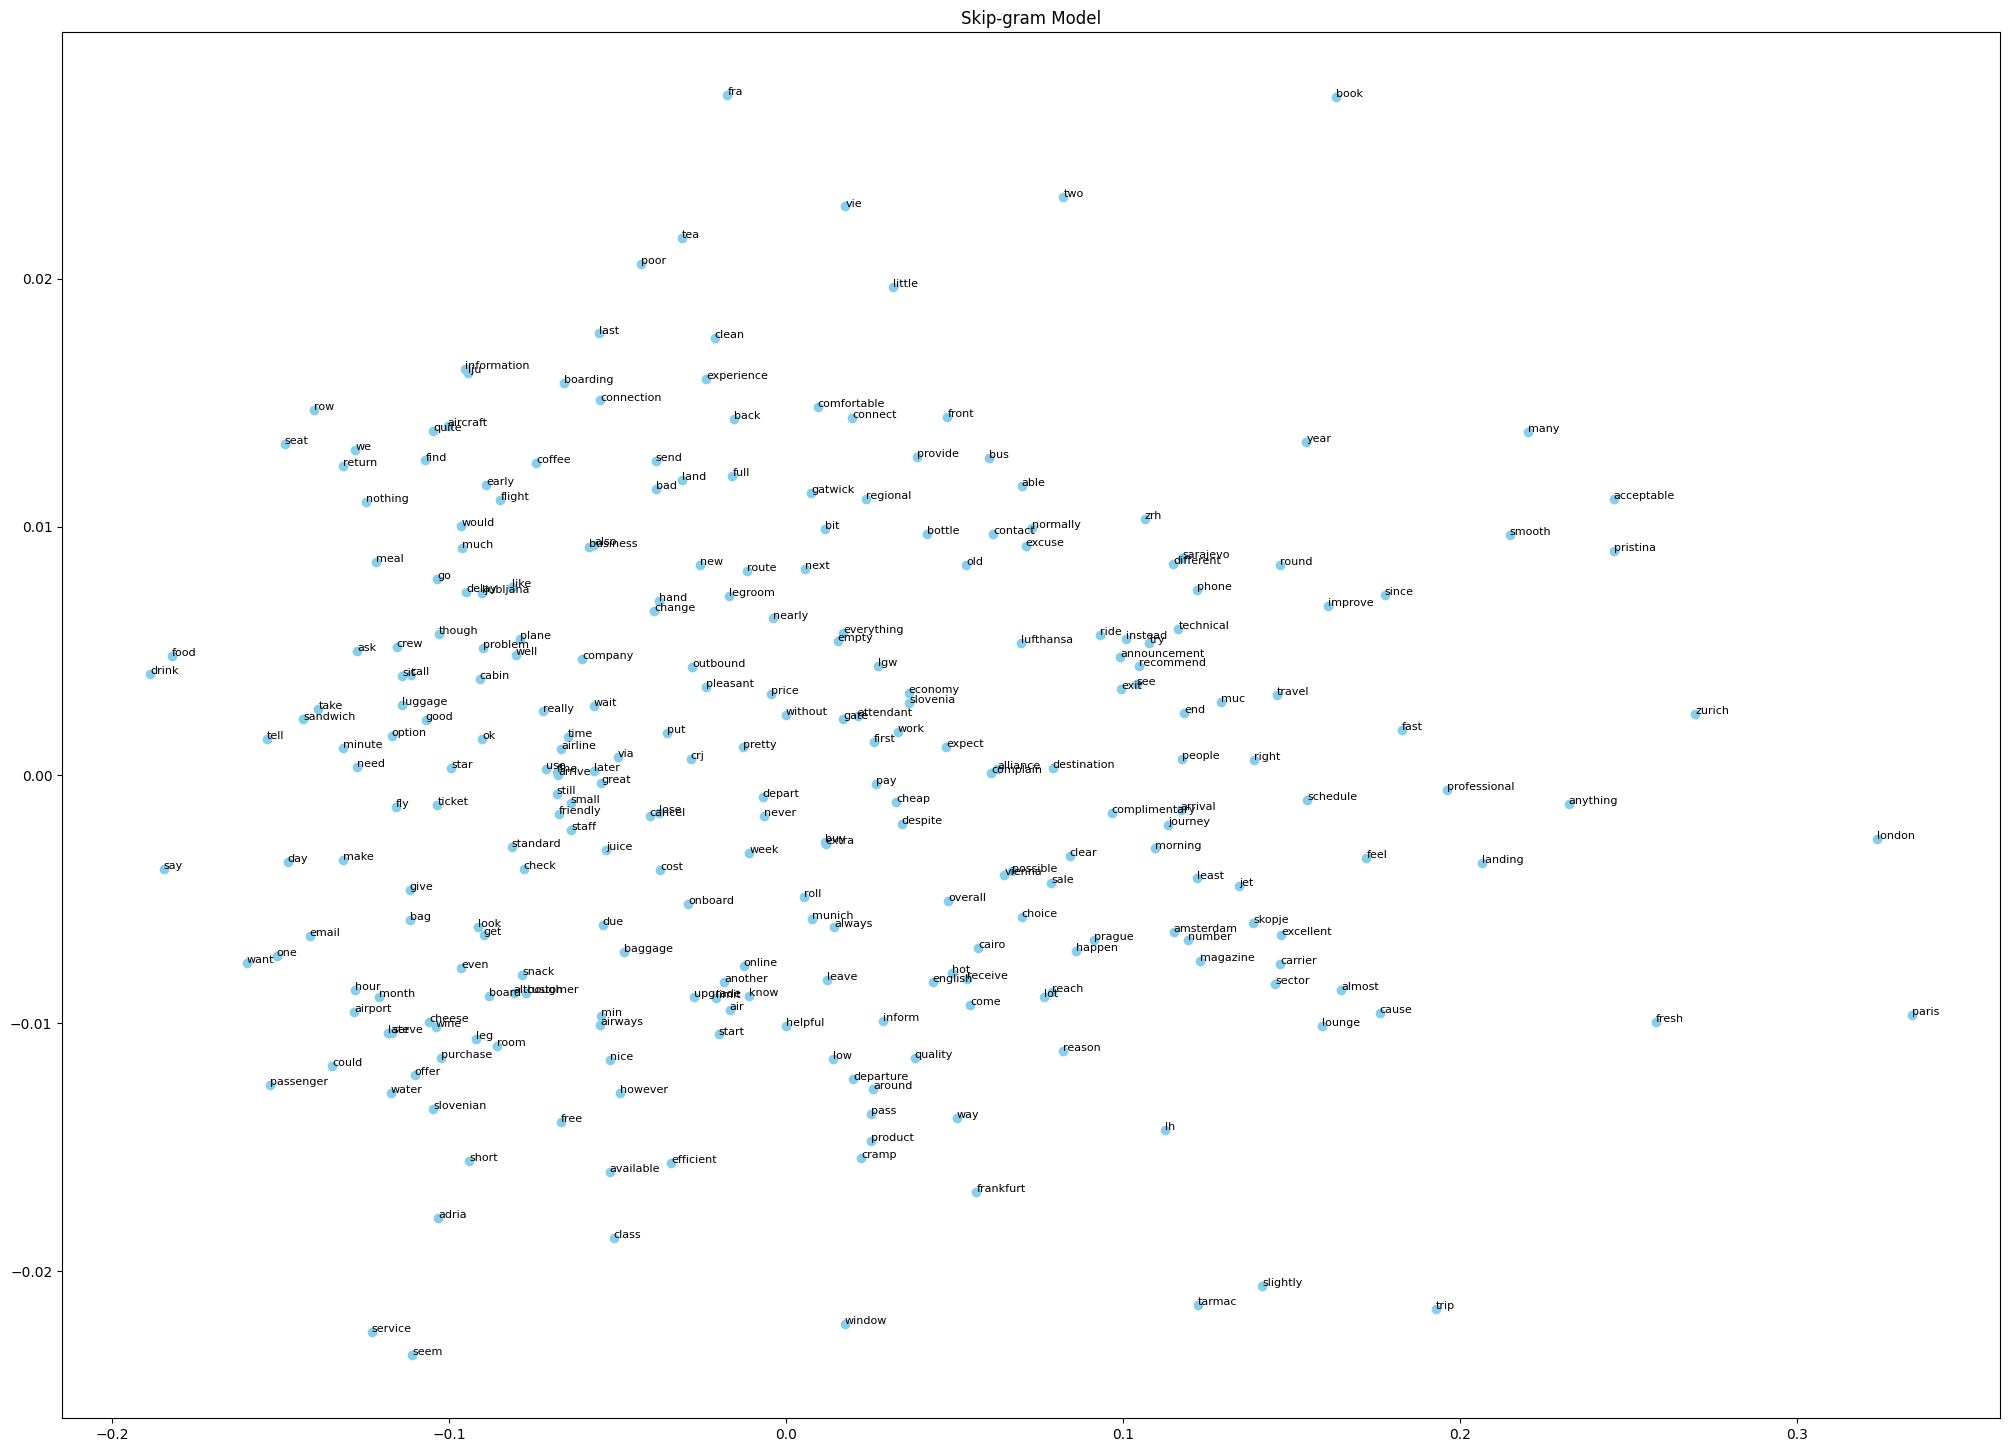

In [12]:
from sklearn.decomposition import PCA
import numpy as np

# extract word vectors from models
words_cbow = list(cbow_model.wv.index_to_key)
vectors_cbow = np.array([cbow_model.wv[word] for word in words_cbow])

words_skipgram = list(skipgram_model.wv.index_to_key)
vectors_skipgram = np.array([skipgram_model.wv[word] for word in words_skipgram])

# PCA 2D
def plot_word_vectors(vectors, words, title):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(vectors)

    plt.figure(figsize=(25, 18))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], color='skyblue')
    for i, word in enumerate(words):
        plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]), fontsize=8)
    plt.title(title)
    plt.show()

# for CBOW model
plot_word_vectors(vectors_cbow, words_cbow, "CBOW Model Word Vectors")

# for Skip-gram model
plot_word_vectors(vectors_skipgram, words_skipgram, "Skip-gram Model")


### Task 3. GloVe and FastText Embeddings

In [13]:
import numpy as np

# GloVe
glove_path = kagglehub.dataset_download("danielwillgeorge/glove6b100dtxt")
glove_path = '/kaggle/input/glove6b100dtxt/glove.6B.100d.txt'

glove_embeddings = {}

with open(glove_path, "r", encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.array(values[1:], dtype="float32")
        glove_embeddings[word] = vector

# get vector
glove_vector = glove_embeddings["flight"]
print(glove_vector) 

[ 1.2190e-01 -6.5646e-01  5.0855e-01  1.4803e-01 -4.5745e-01  1.1827e-01
  4.6018e-01  5.3581e-01 -8.2813e-01  4.0373e-01  5.0201e-01 -5.0410e-02
  6.8212e-01  4.2567e-01  3.9513e-01 -1.0163e+00  2.6394e-01  2.2142e-01
  6.7408e-01 -1.6213e-01  1.3717e-01 -1.1164e-01  2.0477e-01 -3.9182e-01
  4.3068e-01 -7.4969e-03 -1.1939e-01  1.4885e-01  4.8769e-01 -2.6045e-01
 -1.3553e+00  3.5289e-01 -6.3662e-01  2.9303e-01 -2.8167e-01  7.6927e-01
  1.4252e-01  9.8579e-01  7.5879e-01  3.9812e-02 -1.1322e+00 -6.1330e-01
  2.2959e-01 -4.3484e-02  7.4136e-01  3.2916e-01  2.8011e-01 -3.6806e-01
  1.7323e-01  2.1755e-01  2.3531e-01  5.6490e-01 -2.7332e-01  1.3426e+00
  7.1593e-01 -1.7127e+00  5.4045e-01  2.9344e-01  2.6985e+00  2.5432e-01
 -3.0715e-01  9.0095e-01  6.5659e-01 -3.9860e-01 -8.8311e-01 -4.3663e-01
 -9.0197e-01  2.1167e-02 -2.6437e-01  2.4113e-01 -7.5052e-01 -1.0290e+00
 -1.1930e-02  3.3120e-02  4.1661e-01  1.6827e-01  6.9785e-01  1.8665e-02
 -1.3958e+00 -2.5481e-03 -1.5867e-01 -3.5460e-01  3

In [14]:
from sklearn.metrics.pairwise import cosine_similarity

query_vector = glove_embeddings["flight"]
similarities = []

# cosine similarity for each word
for word, vector in glove_embeddings.items():
    similarity = cosine_similarity([query_vector], [vector])[0][0]
    similarities.append((word, similarity))

# Sort by similarity
top_n = 5
similar_words = sorted(similarities, key=lambda x: x[1], reverse=True)[:top_n]

print("Similar words to flight:")
for word, similarity in similar_words:
    print(f"{word}: {similarity}")

Similar words to flight:
flight: 0.9999998807907104
plane: 0.8215627074241638
flights: 0.779574990272522
pilot: 0.7508132457733154
jet: 0.74627685546875


In [15]:
from gensim.models import FastText

# FastText embeddings
sentences = df["processed_review"].tolist()

fasttext_model = FastText(sentences, vector_size=100, epochs=50)

# get vector
fasttext_vector = fasttext_model.wv["flight"] 
print(fasttext_vector)

[-0.19102031 -0.06742976 -0.04290956 -0.08034721  0.2165319  -0.1260733
 -0.15204161  0.47021446 -0.00995424 -0.5277008  -0.05972745 -0.29826748
 -0.07087874  0.4350871  -0.14619301 -0.03039609 -0.11315665 -0.14726222
 -0.14456157 -0.2670475  -0.08926801  0.2685083  -0.27754846  0.08041732
  0.32601193 -0.39651737  0.1836135  -0.04577765  0.22770731  0.05218854
 -0.047404   -0.08560473  0.40912268  0.22957021 -0.12409676  0.30950442
  0.03068467  0.1415826  -0.28405014  0.14818588  0.18440393 -0.46530774
  0.02923317 -0.22155909 -0.208985   -0.01139563 -0.00674745 -0.35041627
 -0.14291997  0.03553151  0.33804658  0.04249313  0.18069874 -0.12372971
  0.12911476 -0.04290143  0.10693702  0.26201817 -0.23153111 -0.00613116
  0.35005552 -0.16581143  0.02253909  0.30320722  0.17815101  0.07451019
 -0.08138387  0.08245447 -0.00629845  0.31045124  0.02863062 -0.09037537
  0.14651877 -0.17036885  0.01424229 -0.108133   -0.0101398  -0.0080169
 -0.1428171   0.08002324 -0.0047793  -0.05768679 -0.0

In [16]:
similarity = cosine_similarity([fasttext_vector], [w2v_vector_cbow])[0][0]

# Print the cosine similarity
print(f"Similarity between FastText and Word2Vec vectors for  word'flight': {similarity}")

Similarity between FastText and Word2Vec vectors for  word'flight': 0.26760953664779663


## 2. Recurrent Neural Networks (RNNs) for NLP

### Exercise 4: Understanding RNNs and the Vanishing Gradient Problem


In [17]:
# Convert to binary labels
df['Sentiment'] = df['Recommended'].map({'yes': 1, 'no': 0})
df = df[['processed_review', 'Sentiment']]

print(df.head())

                                    processed_review  Sentiment
0  [moroni, moheli, turn, pretty, decent, airline...          1
1  [moroni, anjouan, small, airline, ticket, advi...          0
2  [anjouan, dzaoudzi, small, airline, airline, b...          0
3  [please, favor, fly, adria, route, munich, pri...          0
4  [book, flight, airline, friend, return, sofia,...          0


In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Tokenization
max_words = 10000  
max_len = 100 
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df["processed_review"])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(df["processed_review"])
X = pad_sequences(sequences, maxlen=max_len)
y = df["Sentiment"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Sample processed review:", df["processed_review"].iloc[0])
print("Sequence:", sequences[0])

2025-04-15 15:37:43.162477: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744731463.381611      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744731463.448241      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Sample processed review: ['moroni', 'moheli', 'turn', 'pretty', 'decent', 'airline', 'online', 'booking', 'work', 'well', 'checkin', 'boarding', 'fine', 'plane', 'look', 'well', 'maintain', 'short', 'flight', 'minute', 'expect', 'much', 'still', 'manage', 'hand', 'bottle', 'water', 'biscuit', 'though', 'nice', 'flight', 'time']
Sequence: [434, 668, 334, 117, 335, 9, 136, 669, 160, 31, 336, 54, 118, 28, 81, 31, 337, 22, 2, 38, 194, 88, 137, 338, 228, 161, 32, 435, 82, 17, 2, 5]


In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# RNN
model = Sequential([
    Embedding(input_dim=max_words, output_dim=100, input_length=max_len),
    SimpleRNN(64, activation='tanh', return_sequences=False, dropout=0.2),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
I0000 00:00:1744731474.534006      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1744731474.534729      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [20]:
def compute_gradients(model, x_sample, y_sample):
    with tf.GradientTape() as tape:
        y_pred = model(x_sample, training=True)
        loss = tf.keras.losses.binary_crossentropy(tf.reshape(y_sample, (-1, 1)), y_pred)
        loss = tf.reduce_mean(loss)
    grads = tape.gradient(loss, model.trainable_variables)
    return [tf.norm(g).numpy() if g is not None else 0 for g in grads] 

In [21]:
gradient_history = []
for epoch in range(20):
    hist = model.fit(X_train, y_train, epochs=1, batch_size=32, validation_data=(X_test, y_test), verbose=1)
    
    gradients = compute_gradients(model, X_train[:32], y_train[:32])
    gradient_history.append(gradients)

I0000 00:00:1744731477.300347     354 service.cc:148] XLA service 0x7909a8004770 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744731477.301146     354 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1744731477.301170     354 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1744731477.748103     354 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/3 ━━━━━━━━━━━━━━━━━━━━ 9s 5s/step - accuracy: 0.5625 - loss: 0.6865

I0000 00:00:1744731479.371374     354 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.5281 - loss: 0.6900 - val_accuracy: 0.4500 - val_loss: 0.7258
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7539 - loss: 0.5495 - val_accuracy: 0.4000 - val_loss: 0.7326
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9578 - loss: 0.4114 - val_accuracy: 0.5500 - val_loss: 0.7036
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9797 - loss: 0.3014 - val_accuracy: 0.5500 - val_loss: 0.7192
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 0.1909 - val_accuracy: 0.4000 - val_loss: 0.7373
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 0.1282 - val_accuracy: 0.4500 - val_loss: 0.7459
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 0.0734 - val_accuracy: 0.5000 - val_loss: 0.7539
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 1.0000 - loss: 0.0553 - val_accuracy: 0.5000 - val_loss: 0.7745
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 0.0329 - val_accuracy: 0.

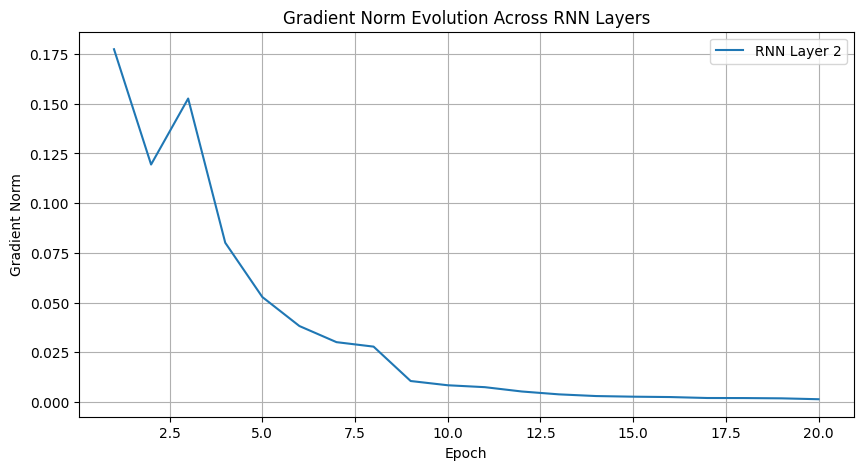

In [22]:
rnn_layer_indices = [i for i, layer in enumerate(model.layers) if isinstance(layer, (tf.keras.layers.SimpleRNN, tf.keras.layers.LSTM, tf.keras.layers.GRU))]

gradient_history = np.array(gradient_history)

plt.figure(figsize=(10, 5))
for i in rnn_layer_indices:
    plt.plot(range(1, 21), gradient_history[:, i], label=f"RNN Layer {i+1}")
    
plt.xlabel("Epoch")
plt.ylabel("Gradient Norm")
plt.title("Gradient Norm Evolution Across RNN Layers")
plt.legend()
plt.grid(True)
plt.show()

### Exercise 5: Applications in Text Classification and Sequence Modeling


In [23]:
from tensorflow.keras.layers import Dropout

# RNN
model = Sequential([
    Embedding(input_dim=max_words, output_dim=100, input_length=max_len),
    SimpleRNN(128, activation='tanh', return_sequences=True, dropout=0.2),
    SimpleRNN(64, activation='tanh', return_sequences=False, dropout=0.2),
    Dense(32, activation='relu'),
    Dropout(0.5), 
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
history = []
for epoch in range(20):
    hist = model.fit(X_train, y_train, epochs=1, batch_size=32, validation_data=(X_test, y_test), verbose=1)
    history.append(hist.history)


history_dict = {
    'accuracy': [h['accuracy'][0] for h in history],
    'val_accuracy': [h['val_accuracy'][0] for h in history],
    'loss': [h['loss'][0] for h in history],
    'val_loss': [h['val_loss'][0] for h in history]
}

3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.5055 - loss: 0.7282 - val_accuracy: 0.4000 - val_loss: 0.7387
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6133 - loss: 0.6127 - val_accuracy: 0.5000 - val_loss: 0.7091
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.8023 - loss: 0.5571 - val_accuracy: 0.5000 - val_loss: 0.6894
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 415ms/step - accuracy: 0.8211 - loss: 0.4733 - val_accuracy: 0.5000 - val_loss: 0.7779
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.8492 - loss: 0.3591 - val_accuracy: 0.6000 - val_loss: 0.7051
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9477 - loss: 0.2780 - val_accuracy: 0.4500 - val_loss: 0.8497
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9898 - loss: 0.2001 - val_accuracy: 0.6000 - val_loss: 0.7567
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 1.0000 - loss: 0.1516 - val_accuracy: 0.3500 - val_loss: 0.8609
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 1.0000 - loss: 0.0786 - val_accuracy: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3500 - loss: 1.2919
Test Accuracy: 0.3500


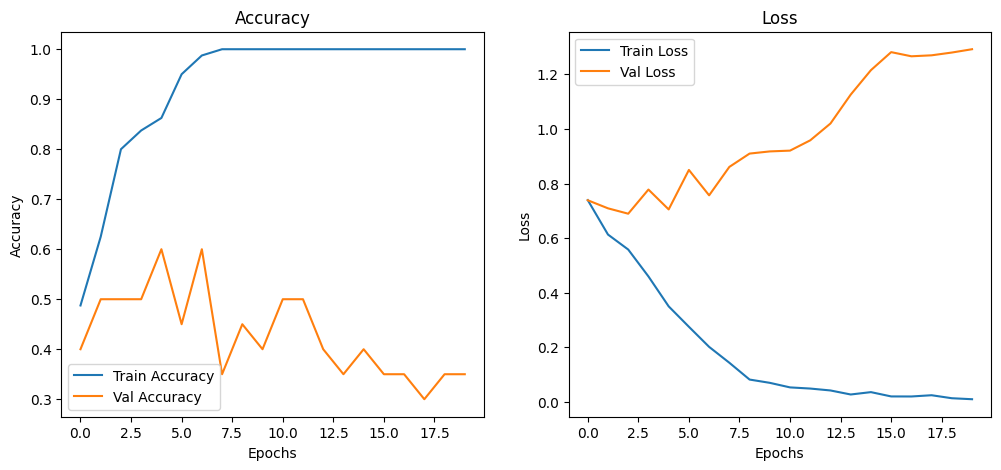

In [25]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'], label='Train Accuracy')
plt.plot(history_dict['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'], label='Train Loss')
plt.plot(history_dict['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Loss")

plt.show()

## 3. Long Short-Term Memory (LSTM) and Gated Recurrent Units (GRU)

### Exercise 6: LSTM vs. GRU – Key Differences

In [26]:
from tensorflow.keras.layers import LSTM, GRU
import time

gru_model = Sequential([
    Embedding(input_dim=max_words, output_dim=100, input_length=max_len),
    GRU(128, activation='tanh', return_sequences=True, dropout=0.2),
    LSTM(64, activation='tanh', return_sequences=False, dropout=0.2),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

gru_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
start_time = time.time()
history_gru = gru_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)
gru_time = time.time() - start_time

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 264ms/step - accuracy: 0.5305 - loss: 0.6926 - val_accuracy: 0.5500 - val_loss: 0.6920
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6180 - loss: 0.6892 - val_accuracy: 0.5500 - val_loss: 0.6894
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5898 - loss: 0.6800 - val_accuracy: 0.5500 - val_loss: 0.6879
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5641 - loss: 0.6798 - val_accuracy: 0.5500 - val_loss: 0.6858
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6062 - loss: 0.6647 - val_accuracy: 0.6500 - val_loss: 0.6825
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8805 - loss: 0.6359 - val_accuracy: 0.5500 - val_loss: 0.6814
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9273 - loss: 0.5775 - val_accuracy: 0.5500 - val_loss: 0.6718
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9656 - loss: 0.4646 - val_accuracy: 0.5500 - val_loss: 0.7425

### Exercise 7: Implementing LSTMs for Text Generation and Classification

In [27]:
# Hamlet dialogue
df = pd.read_csv("/kaggle/input/shakespeare-plays-dialogues/hamlet.csv")
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,act,scene,character,dialogue,line_number
0,Act I,Scene I,[stage direction],FRANCISCO at his post. Enter to him BERNARDO,NaN
1,Act I,Scene I,Bernardo,Who's there?,1.0
2,Act I,Scene I,Francisco,"Nay, answer me: stand, and unfold yourself.",2.0
3,Act I,Scene I,Bernardo,Long live the king!,3.0
4,Act I,Scene I,Francisco,Bernardo?,4.0


In [28]:

text = " ".join(df['dialogue'].dropna().astype(str).tolist()).lower()

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

In [29]:
# input sequences
input_sequences = []
for line in text.split("."):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# Pad sequences
max_seq_length = max(len(x) for x in input_sequences)
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_seq_length, padding='pre'))

In [30]:
from tensorflow.keras.utils import to_categorical
# features and labels
X = input_sequences[:, :-1]
y = input_sequences[:, -1]
y = to_categorical(y, num_classes=total_words)

In [32]:
model = Sequential([
    Embedding(total_words, 100, input_length=max_seq_length-1),
    LSTM(256, return_sequences=True),
    LSTM(128),
    Dense(128, activation='relu'),
    Dense(total_words, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=20, verbose=2)

Epoch 1/20
918/918 - 22s - 24ms/step - accuracy: 0.0352 - loss: 6.7568
Epoch 2/20
918/918 - 18s - 20ms/step - accuracy: 0.0425 - loss: 6.4209
Epoch 3/20
918/918 - 18s - 20ms/step - accuracy: 0.0532 - loss: 6.2290
Epoch 4/20
918/918 - 18s - 19ms/step - accuracy: 0.0588 - loss: 6.0563
Epoch 5/20
918/918 - 17s - 19ms/step - accuracy: 0.0685 - loss: 5.8874
Epoch 6/20
918/918 - 18s - 19ms/step - accuracy: 0.0763 - loss: 5.7420
Epoch 7/20
918/918 - 18s - 19ms/step - accuracy: 0.0837 - loss: 5.6180
Epoch 8/20
918/918 - 18s - 19ms/step - accuracy: 0.0906 - loss: 5.5065
Epoch 9/20
918/918 - 18s - 19ms/step - accuracy: 0.0966 - loss: 5.4019
Epoch 10/20
918/918 - 18s - 19ms/step - accuracy: 0.1036 - loss: 5.3005
Epoch 11/20
918/918 - 18s - 19ms/step - accuracy: 0.1095 - loss: 5.1959
Epoch 12/20
918/918 - 18s - 19ms/step - accuracy: 0.1160 - loss: 5.0941
Epoch 13/20
918/918 - 18s - 19ms/step - accuracy: 0.1245 - loss: 4.9884
Epoch 14/20
918/918 - 18s - 19ms/step - accuracy: 0.1318 - loss: 4.8836
E

In [34]:
from tensorflow.keras.layers import Bidirectional
model_bi = Sequential([
    Embedding(total_words, 100, input_length=max_seq_length-1),
    Bidirectional(LSTM(256, return_sequences=True)),
    Bidirectional(LSTM(128)),
    Dense(128, activation='relu'),
    Dense(total_words, activation='softmax')
])

model_bi.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_bi.fit(X, y, epochs=20, verbose=2)

Epoch 1/20
918/918 - 44s - 48ms/step - accuracy: 0.0343 - loss: 6.6966
Epoch 2/20
918/918 - 38s - 42ms/step - accuracy: 0.0457 - loss: 6.3324
Epoch 3/20
918/918 - 38s - 42ms/step - accuracy: 0.0547 - loss: 6.1533
Epoch 4/20
918/918 - 39s - 42ms/step - accuracy: 0.0618 - loss: 6.0073
Epoch 5/20
918/918 - 38s - 42ms/step - accuracy: 0.0709 - loss: 5.8714
Epoch 6/20
918/918 - 38s - 42ms/step - accuracy: 0.0802 - loss: 5.7395
Epoch 7/20
918/918 - 39s - 42ms/step - accuracy: 0.0875 - loss: 5.6192
Epoch 8/20
918/918 - 39s - 42ms/step - accuracy: 0.0937 - loss: 5.5090
Epoch 9/20
918/918 - 39s - 42ms/step - accuracy: 0.0966 - loss: 5.4154
Epoch 10/20
918/918 - 39s - 42ms/step - accuracy: 0.1042 - loss: 5.3095
Epoch 11/20
918/918 - 38s - 42ms/step - accuracy: 0.1111 - loss: 5.2022
Epoch 12/20
918/918 - 38s - 42ms/step - accuracy: 0.1153 - loss: 5.1061
Epoch 13/20
918/918 - 38s - 42ms/step - accuracy: 0.1217 - loss: 5.0149
Epoch 14/20
918/918 - 38s - 42ms/step - accuracy: 0.1264 - loss: 4.9297
E

In [35]:
def generate_text(seed_text, next_words, model, max_seq_length):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_seq_length-1, padding='pre')
        predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                seed_text += " " + word
                break
    return seed_text

# Generate with lstm
print(generate_text("to be or not", 20, model, max_seq_length))

to be or not to be not to be much than the king of the king that will not is a king of me


In [36]:
# Generate with bilstm
print(generate_text("to be or not", 20, model_bi, max_seq_length))

to be or not i am a king and a king and a king and a king and a king and that i am
